In [1]:
#미국 의대생의 입학관련 데이터셋

#Acceptance : 0이면 불합격, 1이면 합격
#BCPM : Bio/Chem/Physics/Math 과목의 학점 평균 
#GPA : 전체과목 학점 평균
#VR : MCAT Verbal reasoning 과목 점수
#PS : MCAT Physical sciences 과목 점수
#WS : MCAT Writing sample 과목 점수
#BS : MCAT Bidlogical sciences 과목 점수
#MCAT : MCAT 총점
#Apps : 의대 지원 횟수

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


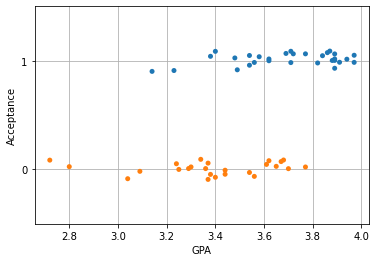

In [3]:
import seaborn as sns
#학점과 합격여부의 상관관계
#jutter = True(데이터의 수가 많을 경우 겹치지 않도록 하는 옵션)
sns.stripplot(x='GPA', y='Acceptance', data=df_med,
              jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

In [4]:
#MCAT = VR + PS + WS + BS 이므로 MCAT는 독립변수에서 제외
model_med = sm.Logit.from_formula('Acceptance ~ Sex + BCPM + GPA + VR + WS + BS + Apps', df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.341684
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.5026
Time:                        09:39:01   Log-Likelihood:                -18.451
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 4.133e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.9323     11.615     -2.921      0.003     -56.697     -11.167
Sex[T.M]      -1.6566      1.

In [5]:
#1974년 '여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다'라는 주장에 대한 찬성, 반대 입장을 조사한 자료
#education : 교육기간
#sex : 성별
#agree : 찬성 인원
#disagree : 반대 인원
#ratio : 찬성 비율
data_wrole = sm.datasets.get_rdataset('womensrole', package='HSAUR')
df_wrole = data_wrole.data
df_wrole['ratio'] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


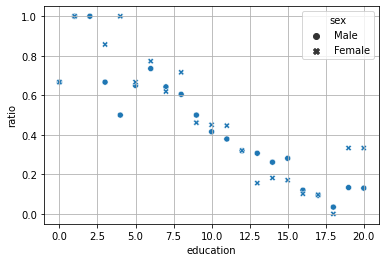

In [6]:
#교육수준이 높을수록 찬성 비율이 감소하고 있음(음의 상관관계)
sns.scatterplot(x='education', y='ratio', style='sex', data=df_wrole)
plt.grid(True)
plt.show()

In [7]:
model_wrole = sm.Logit.from_formula('ratio ~ education + sex', df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())
#성별은 유의하지 않음(logit은 z값(+pvalue)으로 판단)

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.3435
Time:                        09:39:01   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [8]:
#성별을 제거한 모형
model_wrole2 = sm.Logit.from_formula('ratio ~ education', df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.3422
Time:                        09:39:01   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

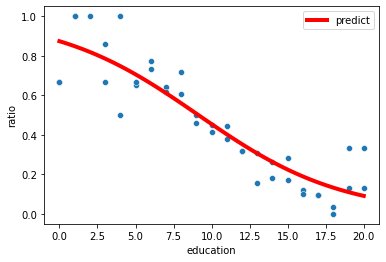

In [9]:
import pandas as pd
sns.scatterplot(x='education', y='ratio', data=df_wrole)
xx = np.linspace(0,20,100)
df_wrole_p = pd.DataFrame({'education':xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p),'r-',lw=4,label='predict')
plt.legend()
plt.show()

---
#### 오존량 예측
- Ozone필드 값의 NA인 레코드들을 평균값으로 입력
- result 필드를 추가하여 ozone이 평균값 이상이면 1, 미만이면 0으로 저장

In [10]:
df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/airquality.csv')
print(df.head())

   Unnamed: 0  Ozone  Solar.R  Wind  Temp  Month  Day
0           1   41.0    190.0   7.4    67      5    1
1           2   36.0    118.0   8.0    72      5    2
2           3   12.0    149.0  12.6    74      5    3
3           4   18.0    313.0  11.5    62      5    4
4           5    NaN      NaN  14.3    56      5    5


In [11]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [12]:
df = df.drop(columns=['Unnamed: 0'],axis =1)

In [13]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [14]:
df.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df[['Ozone']])
df[['Ozone']] = imputer.transform(df[['Ozone']])

In [16]:
df.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [17]:
df.dropna(axis=0, inplace=True)

In [18]:
df['Result'] = np.where(df['Ozone']>df['Ozone'].mean(),1,0)

In [19]:
df.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
Result     0
dtype: int64

In [20]:
df.shape

(146, 7)

In [21]:
df.describe()


,Ozone,Solar.R,Wind,Temp,Month,Day,Result
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,42.106342,185.931507,10.003425,78.116438,7.027397,16.123288,0.527397
std,28.982984,90.058422,3.508795,9.224787,1.404157,8.794897,0.500967
min,1.000000,7.000000,1.700000,57.000000,5.000000,1.000000,0.000000
25%,21.000000,115.750000,7.400000,73.000000,6.000000,9.000000,0.000000
50%,42.129310,205.000000,9.700000,79.000000,7.000000,16.000000,1.000000
75%,45.750000,258.750000,11.500000,84.000000,8.000000,23.750000,1.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000


In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc
#한글처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
rc('font', family=font_name)


Text(0, 0.5, '빈도')

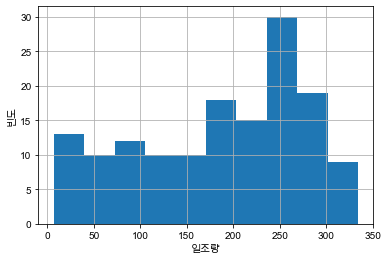

In [23]:
%matplotlib inline 

df['Solar.R'].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

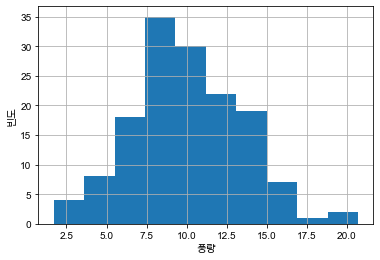

In [24]:
%matplotlib inline 

df['Wind'].hist()
plt.xlabel('풍량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

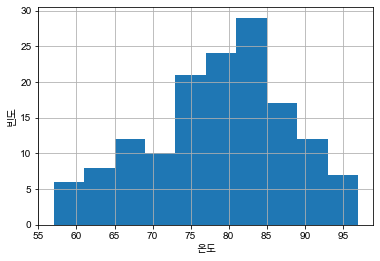

In [25]:
%matplotlib inline 

df['Temp'].hist()
plt.xlabel('온도')
plt.ylabel('빈도')

In [26]:
df['Result'].value_counts()

1    77
0    69
Name: Result, dtype: int64

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n(0 : 부족 || 1 : 정상)')

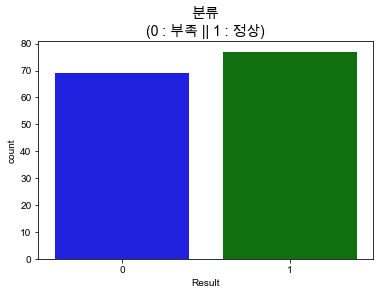

In [27]:
import seaborn as sns

color = ['blue','green']
sns.countplot('Result', data=df, palette=color)
plt.title('분류\n(0 : 부족 || 1 : 정상)', fontsize=14)
#불균형 데이터 셋

In [28]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

cols = ['Solar.R', 'Wind','Temp']
X = df[cols]
y = df['Result']

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp,y_samp],axis=1)

In [29]:
df2['Result'].value_counts()

0    69
1    69
Name: Result, dtype: int64

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n(0 : 부족 || 1 : 정상)')

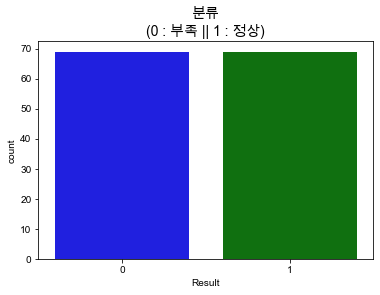

In [30]:
import seaborn as sns

color = ['blue','green']
sns.countplot('Result', data=df2, palette=color)
plt.title('분류\n(0 : 부족 || 1 : 정상)', fontsize=14)

In [31]:
#오버샘플링
from imblearn.over_sampling import SMOTE

cols = ['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp,y_samp],axis=1)

In [32]:
df2['Result'].value_counts()

0    77
1    77
Name: Result, dtype: int64

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n(0 : 부족 || 1 : 정상)')

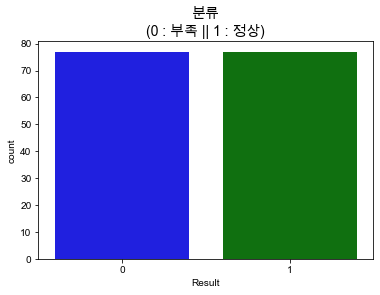

In [33]:
import seaborn as sns

color = ['blue','green']
sns.countplot('Result', data=df2, palette=color)
plt.title('분류\n(0 : 부족 || 1 : 정상)', fontsize=14)

#### 언더샘플링 vs. 오버샘플링
![sampling](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F2yuj6%2FbtqGirRpGhD%2FhmIPmKkQ6WMJ0PbpZZ5Wk0%2Fimg.png)   
- 데이터가 불균형한 분포를 가지는 경우, 모델의 학습이 제대로 이루어지지 않을 수 있다. 이를 해결하기 위해 Undersampling, Oversampling기법을 이용
- Undersamlping : 다수 범주의 데이터를 소수 범주의 데이터 수에 맞게 줄이는 샘플링 방식 
    - Random Sampling : 다수 범주에서 무작위로 샘플링
    - Tomek Links : 두 범주 사이를 탐지하고 정리, 부정확한 분류경계선을 방지
    - CNN Rule : 소수 범주 전체와 다수 범주 중 임의로 선택한 하나의 데이터를 이용, 서비 데이터를 생성
    - Ons Sided Selection : Tomek Links + CNN Rule 
    - 장점 : 다수 범주 데이터의 제거로 계산시간이 감소
    - 단점 : 데이터 제거로 인한 정보 손실 발생 가능

- Oversampling : 소수 범주의 데이터를 다수 범주의 데이터 수에 맞게 늘리는 샘플링 방식
    - Resampling : 소수 범주의 데이터 수를 다수 범주의 데이터 수와 비슷해지도록 증가시키는 방식
    - SMOTE : 소수 범주에서 가상의 데이터를 생성하는 방법
    - Borderline SMOTE : Borderline 부분에 대해서만 SMOTE방식을 사용
    - ADASYN : Borderline SMOTE과 비슷하지만 샘플링 개수를 데이터 위치에 따라 다르게 설정하는 차이가 있음
    - GAN : 생성자와 구분자로 구성, 모델은 딥러닝을 사용하는 최신 오버 샘플링 기법
    - 장점 : 데이터를 증가시키기 때문에 정보 손실이 없음. 대부분의 경우 언더 샘플링에 비해 높은 분류 정확도
    - 단점 : 데이터 증가로 인해 계산 시간이 증가할 수 있으며 과적합 가능성이 존재. 노이즈 또는 이상치에 민감
- 출처
    - https://hwi-doc.tistory.com/entry/%EC%96%B8%EB%8D%94-%EC%83%98%ED%94%8C%EB%A7%81Undersampling%EA%B3%BC-%EC%98%A4%EB%B2%84-%EC%83%98%ED%94%8C%EB%A7%81Oversampling
    - https://casa-de-feel.tistory.com/15

In [34]:
X = X_samp[cols]
y = y_samp['Result']

In [35]:
import statsmodels.api as sm
#특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음 
#model = sm.Logit(y,X,method='bfgs')

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.565828
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.184     
Dependent Variable: Result           AIC:              180.2750  
Date:               2022-04-04 10:01 BIC:              189.3859  
No. Observations:   154              Log-Likelihood:   -87.138   
Df Model:           2                LL-Null:          -106.74   
Df Residuals:       151              LLR p-value:      3.0530e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0032     0.0021    1.5096   0.1312   -0.0009    0.0073
Wind      -0.2952     0.0578   -5.1071   0.0000   -0.4085 

In [36]:
#pvalue가 0.05보다 큰 값들을 제거
cols = ['Wind', 'Temp']

X = X_samp[cols]
y = y_samp['Result']
df2 = pd.concat([X,y],axis=1)

In [37]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573368
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.173     
Dependent Variable: Result           AIC:              180.5975  
Date:               2022-04-04 10:10 BIC:              186.6714  
No. Observations:   154              Log-Likelihood:   -88.299   
Df Model:           1                LL-Null:          -106.74   
Df Residuals:       152              LLR p-value:      1.2487e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2873     0.0566   -5.0730   0.0000   -0.3983   -0.1763
Temp       0.0377     0.0075    5.0360   0.0000    0.0231 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
print('학습용:',model.score(X_train,y_train))
print('검증용:',model.score(X_test,y_test))

학습용: 0.7723577235772358
검증용: 0.7741935483870968


In [39]:
#confusion matrix(혼돈행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[12,  4],
       [ 3, 12]])

In [40]:
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,12,4
1,3,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

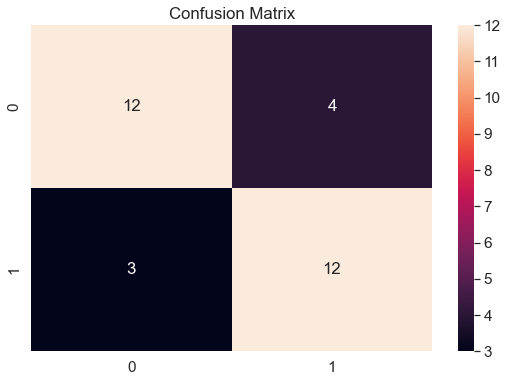

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True)
#색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자